# Упражнение 1.2

Загрузим с сайта freesound.org образец звука и исследуем его различными способами. При исследовании будем использовать библиотеку thinkdsp. Для начала представим исследуемый образец в виде волны (wave)

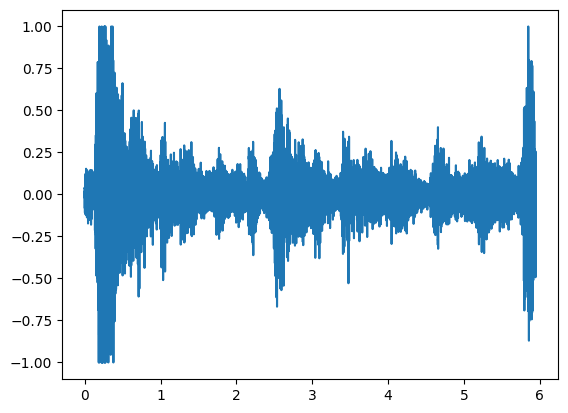

In [3]:
from thinkdsp import read_wave
from IPython.display import Audio
wave = read_wave('161707__xserra__turkish-music-1.wav')
audio = Audio(data=wave.ys, rate=wave.framerate)
wave.plot()
audio

Далее выделим промежуток длительностью 0.3 секунды – с 4.3 по 4.6 секунду. Исследуем его.

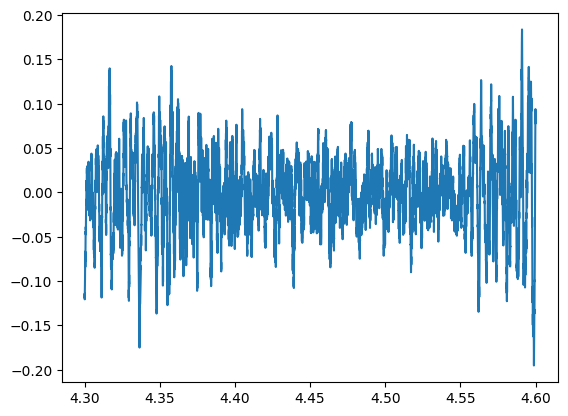

In [9]:
segment = wave.segment(start = 4.3, duration= 0.3)
audio1 = Audio(data=segment.ys, rate=segment.framerate)
segment.plot()
audio1

Получим спектр выбранного фрагмента.

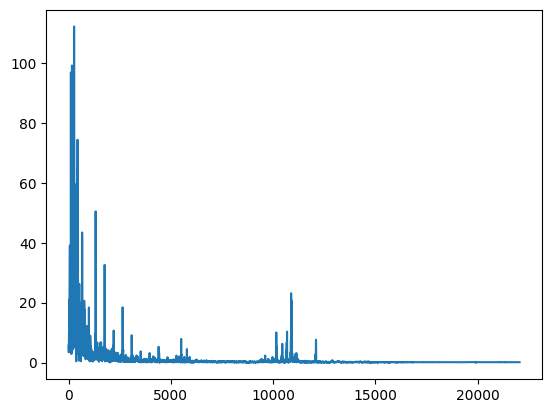

In [11]:
spectrum = segment.make_spectrum()
spectrum.plot()

По рис.выше можно увидеть, что в выбранном сегменте преобладают низкие частоты.
Ограничим рассматриваемую частоту до 600 Гц, чтобы посмотреть, какие частоты являются доминирующими в данном фрагменте.


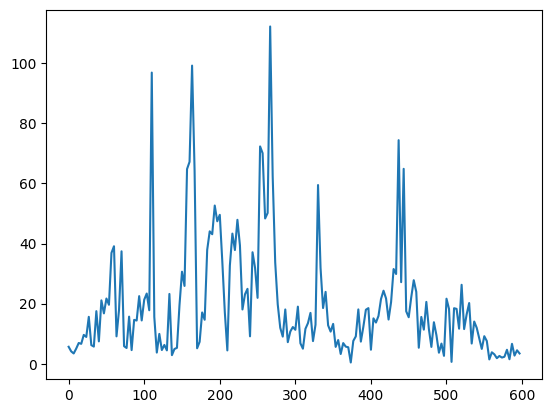

In [16]:
spectrum.plot(high=600)

Видим, что самое большое число находится на отметке 260 Гц.

Далее получим список пиковых частот


In [18]:
spectrum.peaks()[:5]

[(112.25551138249092, 266.6666666666667),
 (99.23223171374043, 163.33333333333334),
 (96.90698315144182, 110.0),
 (74.4126508302405, 436.6666666666667),
 (72.33538831082356, 253.33333333333334)]

Далее отбросим высокие частоты (более 5000 Гц)и послушаем, что получилось

In [19]:
spectrum.low_pass(5000)
spectrum.make_wave().make_audio()

Звук стал ниже. Теперь отбросим низкие частоты (ниже 1500 Гц) и послушаем, что получилось

In [20]:
spectrum.high_pass(1500)
spectrum.make_wave().make_audio()

Звук стал выше. Теперь, используя band_stop, отбросим все частоты вне диапазона 500Гц - 2000Гц

In [23]:
spectrum.band_stop(500,2000)
spectrum.make_wave().make_audio()

In [28]:
spectrum.band_stop(500,2000)
spectrum.make_wave().make_audio()

# Упражнение 1.3

Создадим обьекты SinSignal и CosSignal, далее просумируем их. Получили следующий
"сложный" сигнал:

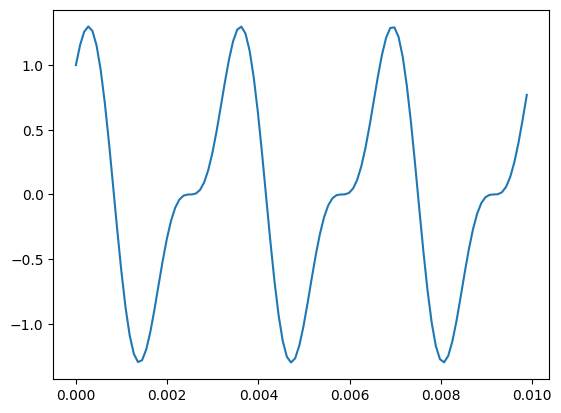

In [29]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=300, amp=1.0, offset=0)
sin_sig = SinSignal(freq=600, amp=0.5, offset=0)
mix = sin_sig + cos_sig
mix.plot()
wave2 = mix.make_wave()
audio2 = Audio(data=wave2.ys, rate=wave2.framerate)
audio2

Вычислим спектр данного сигнала и распечатаем его

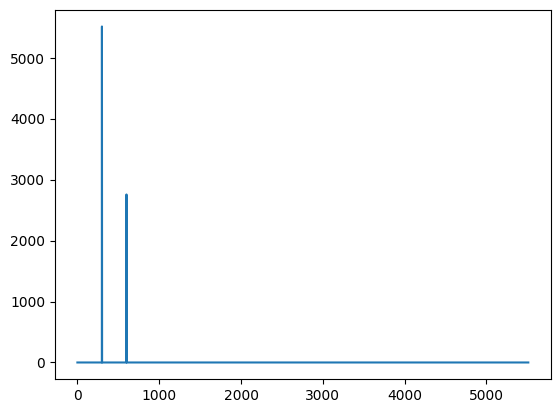

In [30]:
spectrum2 = mix.make_wave().make_spectrum()
spectrum2.plot()

Если добавить сигнал, не кратный 100, то мы услышим его как выделяющийся звук

In [31]:
mix += SinSignal(freq=367)
mix.make_wave().make_audio()

## Упражнение 1.4

Создадим функцию stretch, которая ускоряет (или замедляет) аудиозапись

In [38]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

Протестируем ее. Аудиозапись ускорилась в 2 раза

In [39]:
stretch(wave, 0.5)
wave.make_audio()

В данном случае мы изменяем ts - массив моментов выборки и преобразования сигнала, умножая его на 0.5, мы уменьшаем длительность аудиозаписи, а увеличивая частоту фреймов (делением на 0.5 мы умножаем на 2), мы ускоряем запись